## Clustering NBA players

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
nba = pd.read_csv(r'C:\Users\mi\MLcourse\mlcourse.ai\data\nba_2013.csv')

In [4]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)

KMeans(n_clusters=5, random_state=1)

Text(0.5, 1.0, 'Some interpretation')

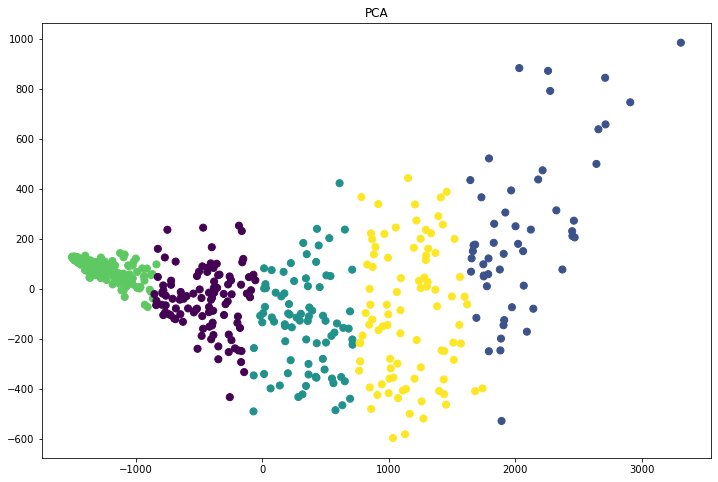

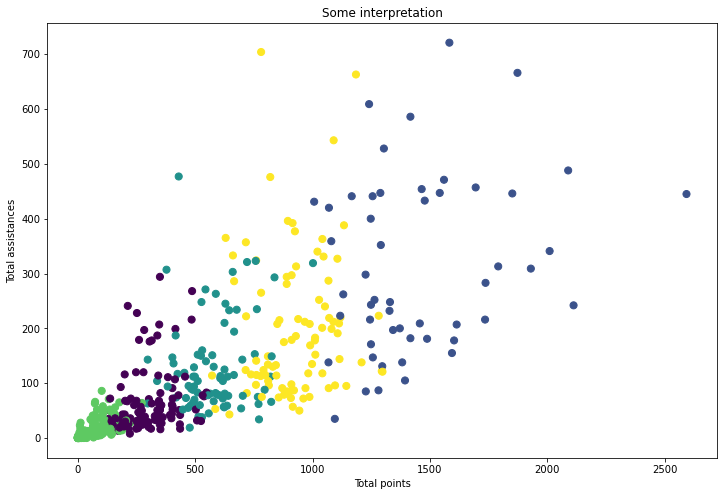

In [7]:
# Visualizing using PCA
pca = PCA (n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:, 0], res[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Visualizing using 2 features: Total points vs. Total assists
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assistances')
plt.title('Some interpretation')

## Compressing images with k-Means

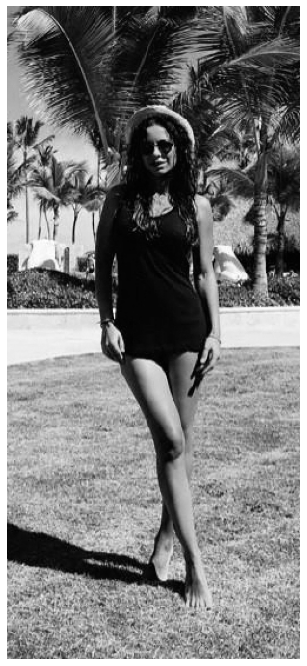

In [17]:
import matplotlib.image as mpimg
img = mpimg.imread(r'C:/Users/mi/MLcourse/mlcourse.ai/img/woman.jpg')[..., 1]
plt.figure(figsize=(20,12))
plt.axis('off')
plt.imshow(img, cmap='gray');

In [18]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

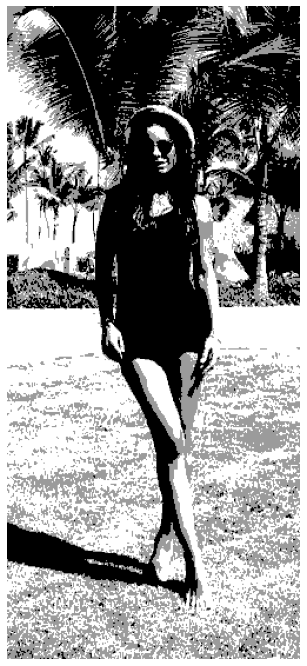

In [21]:
X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=3)
k_means.fit(X)
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize=(20,12))
plt.axis('off')
plt.imshow(img_compressed, cmap='gray');

## Finding latent topics in texts

We'll apply k-Means to cluster texts from 4 categories

In [23]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time

In [26]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]

print("Loading 20 newsgroups dataset for catigories: ")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for catigories: 
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


In [27]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000


Apply k-Means to the vectors that we've got. Also, calculate clustering metrics

In [28]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
Homogeneity: 0.489
Completeness: 0.538
V-measure: 0.512
Adjusted Rand-Index: 0.487
Silhouette Coefficient: 0.018


Output words that are close to cluster centers

In [29]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end=' ')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end=' ')
    print()

Cluster 1:  graphics  university  com  thanks  posting  host  nntp  image  ac  computer 
Cluster 2:  henry  keith  sgi  toronto  livesey  caltech  jon  wpd  solntze  zoo 
Cluster 3:  god  com  people  article  sandvik  don  jesus  say  christian  just 
Cluster 4:  space  nasa  access  digex  gov  pat  alaska  shuttle  com  moon 


## Clustering handwritten digits

In [30]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [31]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [32]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, kmeans.predict(X))

0.6709209959049727

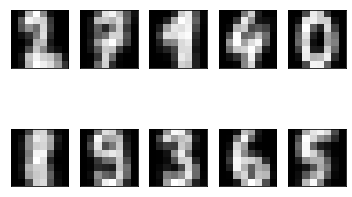

In [36]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())